In [32]:
import astropy as ap
from astropy.io import fits
from matplotlib.pylab import *
%matplotlib inline

import glob

lst=['0-0.01','0.02-0.05','0.1-0.2','0.3-0.4','0.5-0.7',
'1-1.2','1.5-2','3-4','0.01-0.02','0.05-0.1','0.2-0.3',
'0.4-0.5','0.7-1','1.2-1.5','2-3']


adds=glob.glob('./data/'+'1.2-1.5'+'/*.fits')

def spec(n):
    spc = fits.open(adds[n])
    x = np.stack((spc['COADD'].data['loglam'],spc['COADD'].data['flux']), axis=-1)
    return x

def plotspec(n):
    plot(spec(n)[:,0],spec(n)[:,1],lw=1)
#    xlim([3.79,3.8])
#    ylim([-2,2])
    xlabel(r'$\lambda$',fontsize=20)
    ylabel(r'$F$',fontsize=20)


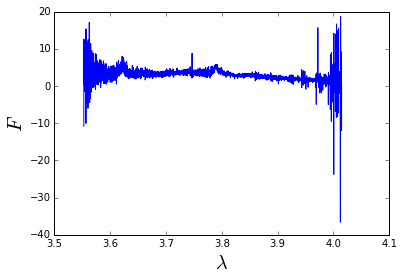

In [33]:
plotspec(7)

In [61]:
def corr(n,m):
    cor = np.correlate(spec(m)[:,0],spec(n)[:,1], "same")
#    for k in range(cor.shape[0]):
#        cor[k]=cor[k]/(cor.shape[0]-k+1)
#    xlim([0,cor.shape[0]-2])    
    plot(cor,lw=1)

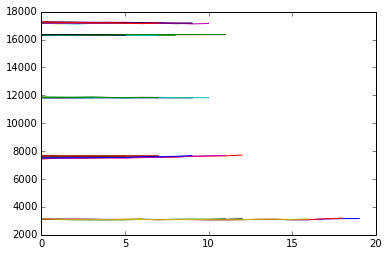

In [54]:
for i in range(1,10):
    for j in range(11,16):
        corr(j,i)

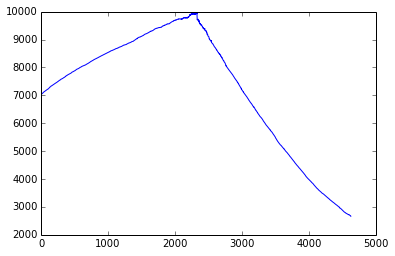

In [64]:
 corr(2,4)

In [13]:
spec(1)[:,1].reshape((spec(1)[:,1].shape[0],1)).shape

(4612, 1)

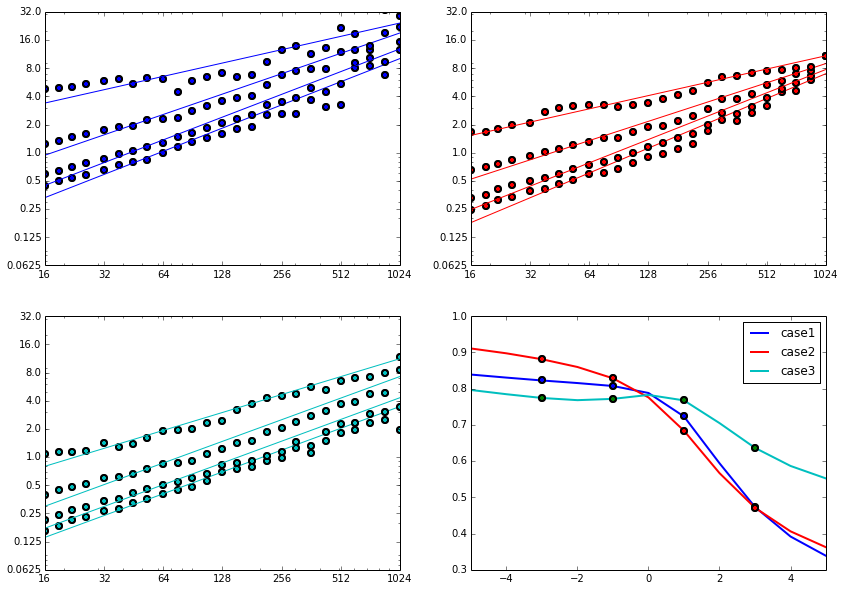

In [2]:
n1=1
n2=4
n3=5
case1 = spec(n1)[:,1].reshape((spec(n1)[:,1].shape[0],1))
case2 = spec(n2)[:,1].reshape((spec(n2)[:,1].shape[0],1))
case3 = spec(n3)[:,1].reshape((spec(n3)[:,1].shape[0],1))

def trends(X,scale,m=1):
    X = X[:X.shape[0]-X.shape[0]%scale].reshape(-1,scale)
    i = arange(scale,dtype='f8')
    RMS = zeros(X.shape[0],'f8')
    for j in arange(X.shape[0]):
        C = polyfit(i,X[j],m)
        fit = polyval(C,i)
        RMS[j] = sqrt(((X[j]-fit)**2).mean())
    return RMS

def plot_logfit(x,y,lc):
    C = polyfit(log2(x),log2(y),m)
    plot(x,2**polyval(C,log2(x)),lc,label='Slope H = %0.2f'%C[0])

def comp_Fqs(X,scales,q,m=1):
    RW = cumsum(X-X.mean())
    if q == 0:
        return array([ exp(0.5*mean(log(trends(RW,scale,m)**2))) for scale in scales ])
    return array([ pow((trends(RW,scale,m)**q).mean(),1.0/q) for scale in scales ])

def plot_Fqs(X,scales,qs,plotq,c):
    Hs = []
    for q in qs:
        Fq = comp_Fqs(X,scales,q,1)
        Hs.append(polyfit(log2(scales),log2(Fq),1)[0])
        if q in plotq:
            loglog(scales,Fq,c+'o',markeredgewidth=2.0)
            axis([16,1024,2**-4,32])
            xticks(2**arange(4,11),2**arange(4,11))
            yticks(2.0**arange(-4,6),2.0**arange(-4,6))
            plot_logfit(scales,Fq,c)
    return array(Hs)

m = 1
figure(figsize=(14,10))

scales = floor(2.0**arange(4,11,0.25)).astype('i4')
qs = arange(-5,6)
plotqs = [-3,-1,1,3]
subplot(221)
Hmf = plot_Fqs(case1,scales,qs,plotqs,'b')
subplot(222)
H1f = plot_Fqs(case2,scales,qs,plotqs,'r')
subplot(223)
Hwn = plot_Fqs(case3,scales,qs,plotqs,'c')

subplot(224)
plot(qs,Hmf,'b',lw=2.0,label='case1')
plot(qs,H1f,'r',lw=2.0,label='case2')
plot(qs,Hwn,'c',lw=2.0,label='case3')
plot(plotqs,Hmf[[2,4,6,8]],'bo',lw=2.0,mew=2.0)
plot(plotqs,H1f[[2,4,6,8]],'ro',lw=2.0,mew=2.0)
plot(plotqs,Hwn[[2,4,6,8]],'go',lw=2.0,mew=2.0)
xlim(qs[0],qs[-1])
legend()

In [33]:
spec(1).shape

(4612, 2)

In [35]:
cor = np.correlate(spec(1)[:,0],spec(2)[:,1], "same")

In [40]:
print()

4625


TypeError: 'int' object is not iterable